# Prerequisites

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Prepare the data

In [2]:
KAGGLE = True
if KAGGLE:
    data_path = "/kaggle/input/housesalesprediction/kc_house_data.csv"
else:
    data_path = "data/kc_house_data.csv"
    
data_df = pd.read_csv(data_path)

Let's split the data in train and validation subsets.

In [16]:
train_df, valid_df = train_test_split(data_df, test_size=0.2, random_state=42, shuffle=True )

In [13]:
print(train_df.shape)
print(valid_df.shape)

(17290, 21)
(4323, 21)


# Feature engineering

In [17]:
for df in [train_df, valid_df]:
    df['date'] = pd.to_datetime(df['date'])
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['quarter'] = df['date'].dt.quarter
    df['is_month_start'] = pd.to_numeric(df['date'].dt.is_month_start)
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['is_weekend'] = pd.to_numeric(df['dayofweek'] >= 5)
    df['sqft_garden'] = df['sqft_lot'] - df['sqft_living']
    df['sqft_garden15'] = df['sqft_lot15'] - df['sqft_living15']
    df['is_renovated'] = pd.to_numeric(df['yr_renovated'] > 0)
    df['newly_renovated'] = pd.to_numeric(df['year'] - df['yr_renovated'] < 5)

train_df = train_df.drop('date', axis = 1)
valid_df = valid_df.drop('date', axis = 1)

In [18]:
train_df.columns.values

array(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'dayofweek', 'dayofyear',
       'quarter', 'is_month_start', 'month', 'year', 'is_weekend',
       'sqft_garden', 'sqft_garden15', 'is_renovated', 'newly_renovated'],
      dtype=object)

In [19]:
train_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,dayofyear,quarter,is_month_start,month,year,is_weekend,sqft_garden,sqft_garden15,is_renovated,newly_renovated
6325,5467910190,325000.0,3,1.75,1780,13095,1.0,0,0,4,...,147,2,False,5,2014,False,11315,10345,False,False
13473,9331800580,257000.0,2,1.00,1000,3700,1.0,0,0,3,...,69,1,False,3,2015,False,2700,3730,False,False
17614,2407000405,228500.0,3,1.00,1080,7486,1.5,0,0,3,...,57,1,False,2,2015,False,6406,6630,False,False
16970,5466700290,288000.0,3,2.25,2090,7500,1.0,0,0,4,...,8,1,False,1,2015,False,5410,5550,False,False
20868,3026059361,479000.0,2,2.50,1741,1439,2.0,0,0,3,...,107,2,False,4,2015,False,-302,8364,False,False


Let's visualize the correlation between the features in train dataset.

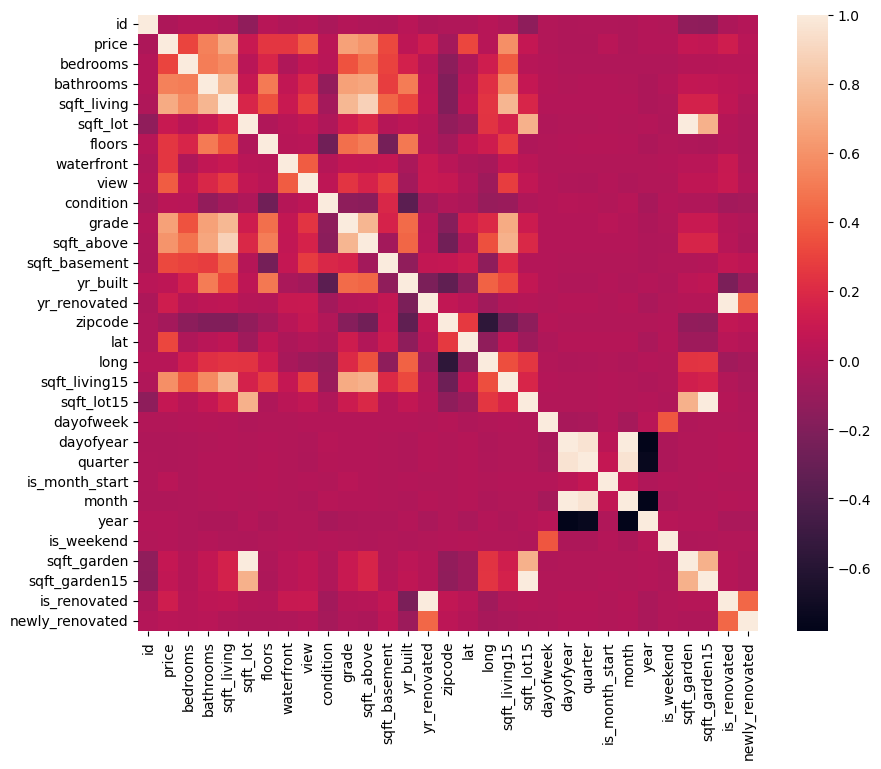

In [20]:
corr = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr)
plt.show()

Let's see which features have higher correlation with the target variable.

In [21]:
corr['price'].sort_values(ascending=False)

price              1.000000
sqft_living        0.701701
grade              0.665093
sqft_above         0.603255
sqft_living15      0.582667
bathrooms          0.526618
view               0.392108
sqft_basement      0.321387
lat                0.310770
bedrooms           0.308262
floors             0.253425
waterfront         0.252946
yr_renovated       0.127737
is_renovated       0.127426
sqft_lot           0.091039
sqft_lot15         0.079152
sqft_garden        0.074936
sqft_garden15      0.064997
yr_built           0.049100
condition          0.036344
newly_renovated    0.026380
is_month_start     0.024978
long               0.023486
year               0.010958
is_weekend         0.007585
dayofweek          0.003692
quarter           -0.011236
month             -0.013528
dayofyear         -0.015109
id                -0.020623
zipcode           -0.053803
Name: price, dtype: float64

In [22]:
X_train = train_df[[column for column in list(train_df.columns.values) if column not in ['price', 'date']]]
y_train = train_df[['price']]

In [23]:
X_valid = valid_df[[column for column in list(valid_df.columns.values) if column not in ['price', 'date']]]
y_valid = valid_df[['price']]

# Training

In [24]:
reg = LinearRegression(n_jobs = 8).fit(X_train, y_train)

# Evaluation

In [25]:
predicted_prices = reg.predict(X_valid)
rmse = sqrt(mean_squared_error(y_valid, predicted_prices))
print(f"The RMSE for Linear Regression model is {round(rmse, 3)}")

The RMSE for Linear Regression model is 211384.189
